In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import sys
sys.path.append('../../')

In [3]:
from codes.docs.analysis import data_preprocessing, logging_outputs

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import tqdm

# Data Exploration

## PRS as continuous variable

In [129]:
# performing univariate test to individual connections to identify which region is highly associated with prs pval.

In [5]:
import statsmodels.api as sm

In [6]:
european_diffusion_dataset_term_removed_zeros=pd.read_csv('./reduced_european_diffusion_dataset.csv')

In [102]:
model_list={}
for threshold in tqdm.tqdm(['X1e.08','X1e.07','X1e.06','X1e.05','X0.0001','X0.001','X0.01','X0.05', 'X0.1', 'X0.5', 'X1']):
    X=european_diffusion_dataset_term_removed_zeros[['GA.at.birth','PMA.at.birth','Gender','Anc_PC1','Anc_PC2','Anc_PC3',threshold]]
    X=sm.add_constant(X)
    model_list[threshold]={}
    for connection in european_diffusion_dataset_term_removed_zeros.columns[5:2518]:
        y=european_diffusion_dataset_term_removed_zeros[connection]
        model=sm.OLS(y,X).fit()
        model_list[threshold][connection]=list(model.pvalues)
        model_list[threshold][connection].append(threshold)

100%|██████████| 11/11 [00:29<00:00,  2.69s/it]


In [117]:
diffusion_term_p_val=list()
for (threshold,threshold_dict) in model_list.items():
    diffusion_term_p_val.append(pd.DataFrame(threshold_dict).T)

In [118]:
diffusion_term_p_val=pd.concat(diffusion_term_p_val)
diffusion_term_p_val.reset_index(level=diffusion_term_p_val.index.names, inplace=True)
diffusion_term_p_val.columns=['Connection','const_pval','GA.at.birth_pval','PMA.at.birth_pval','Gender_pval','Anc_PC1_pval','Anc_PC2_pval','Anc_PC3_pval','prs_pval','PRS_threshold']

In [121]:
diffusion_term_p_val

,Connection,const_pval,GA.at.birth_pval,PMA.at.birth_pval,Gender_pval,Anc_PC1_pval,Anc_PC2_pval,Anc_PC3_pval,prs_pval,PRS_threshold
0,PreCG.R_PreCG.L,0.406664,0.422452,0.649833,0.539632,0.238849,0.393302,0.232057,0.257967,X1e.08
1,SFGdor.L_PreCG.L,0.497951,0.735798,0.0395417,0.143424,0.387479,0.164749,0.713968,0.743205,X1e.08
2,SFGdor.L_PreCG.R,0.0227189,0.663313,0.269094,0.108764,0.088237,0.0378456,0.0916056,0.308123,X1e.08
3,SFGdor.R_PreCG.L,0.481934,0.0681159,0.278703,0.679659,0.652489,0.585485,0.316677,0.145814,X1e.08
4,SFGdor.R_PreCG.R,0.588622,0.783456,0.00539435,0.728111,0.823513,0.668472,0.607311,0.761243,X1e.08
...,...,...,...,...,...,...,...,...,...,...
27638,ITG.R_HES.R,0.0572186,0.581323,0.00791149,0.000222678,0.0645619,0.157064,0.554809,0.977391,X1
27639,ITG.R_STG.R,0.132766,0.789354,0.140241,0.000697267,0.10621,0.36818,0.444619,0.802675,X1
27640,ITG.R_TPOsup.R,0.187097,0.676388,0.0527685,0.855562,0.373147,0.215032,0.0951028,0.40262,X1
27641,ITG.R_MTG.R,0.00200216,0.328493,5.87721e-08,0.00375281,0.0430643,0.216995,0.892575,0.409282,X1


In [128]:
diffusion_term_p_val.to_csv('./preprocessed_data/diffusion/term/obsv_diffusion_term_p_val.csv',index=False)

In [131]:
diffusion_term_p_val.sort_values(by=['prs_pval'],ascending=True)

,Connection,const_pval,GA.at.birth_pval,PMA.at.birth_pval,Gender_pval,Anc_PC1_pval,Anc_PC2_pval,Anc_PC3_pval,prs_pval,PRS_threshold
7755,SFGmed.L_ORBinf.L,0.00320451,0.434531,0.00112115,0.250367,0.531204,0.875959,0.889344,0.000220984,X1e.05
1305,PreCUN.L_SPG.R,0.048728,0.561042,0.00782512,0.0602574,0.125702,0.252899,0.112088,0.00027,X1e.08
14656,STG.R_SMA.R,0.548276,0.541538,0.023814,0.706268,0.286264,0.71344,0.451535,0.000273131,X0.001
27486,TPOmid.L_IPL.L,2.77927e-07,0.166529,0.0511828,0.114808,0.30803,0.664681,0.0135045,0.000296317,X1
24973,TPOmid.L_IPL.L,3.14786e-07,0.182136,0.0467624,0.118771,0.314801,0.682284,0.0138623,0.000335044,X0.5
...,...,...,...,...,...,...,...,...,...,...
11763,PAL.L_PCG.L,0.457168,0.0166217,0.00159305,0.776215,0.000101502,7.30569e-08,0.0892522,0.999827,X0.0001
16543,CAU.L_CUNE.L,0.948979,0.336769,0.615906,0.0883483,0.454481,0.833085,0.0176331,0.999836,X0.01
13099,PCG.R_INS.R,0.0339597,0.516769,0.67133,0.148313,0.000629715,0.0143269,0.523487,0.99985,X0.001
14319,PAL.R_ORBmid.R,0.000503112,0.529732,8.91543e-05,0.677981,0.658101,0.4661,0.339856,0.999904,X0.001


### Mutiple comparison corrections

by Bonferroni we need 0.05/27643= 10e-5 to account for multiple testing correction

Computing the effective number of independent tests performed

Meff= Meff_connections * Meff_prs_thresholds
Multiple-comparison corrected p-value thresholds= 0.05/Meff



In [15]:
PRS_thresholds=['X1e.08','X1e.07','X1e.06','X1e.05','X0.0001','X0.001','X0.01','X0.05', 'X0.1', 'X0.5', 'X1']
PRS_thresholds_corr_matrix=np.corrcoef(european_diffusion_dataset_term_removed_zeros.loc[:,PRS_thresholds],rowvar=False)
np.savetxt('PRS_threshold_corr_matrix',PRS_thresholds_corr_matrix,delimiter='\t')

The Meff_prs_thresholds is 3

In [18]:
np.corrcoef(european_diffusion_dataset_term_removed_zeros.iloc[:,5:2518],rowvar=False)

(2513, 2513)

The connectivity with significantly lower number of fibers in higher risk neonates identified by Shi et al., 2012 are 
- SOG.L_CAL.R (removed)
- CUN.L_PCG.R (removed)
- CAU.R_SOG.R 
- CAU.R_MOG.R
- PAL.R_PCL.R
- TPOmid.R_THA.R

Other identified in the adult neuroimaging
- Frontal lobe to Thalamus, cingulate gyrus
- Frontal lobe to Insula, hippocampus-amygdala, temporal and occipital lobes


In [140]:
from statsmodels.stats.multitest import fdrcorrection
adjusted_p_val=fdrcorrection(diffusion_term_p_val['prs_pval'])[1]

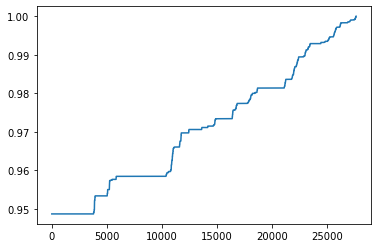

In [142]:
plt.plot(np.sort(adjusted_p_val))

In [171]:
diffusion_term_p_val[diffusion_term_p_val['Connection'].map(lambda x: True if x in ['CAU.R_SOG.R','CAU.R_MOG.R','PAL.R_PCL.R','TPOmid.R_THA.R'] else False)]

,Connection,const_pval,GA.at.birth_pval,PMA.at.birth_pval,Gender_pval,Anc_PC1_pval,Anc_PC2_pval,Anc_PC3_pval,prs_pval,PRS_threshold
1527,CAU.R_SOG.R,0.397299,0.191544,0.0730791,0.585685,0.90552,0.697604,0.214607,0.663863,X1e.08
1529,CAU.R_MOG.R,0.6207,0.693003,0.882247,0.150877,0.987798,0.246538,0.176945,0.302149,X1e.08
1803,PAL.R_PCL.R,0.855852,0.779127,0.470746,0.890325,0.817844,0.91293,0.279775,0.837431,X1e.08
2410,TPOmid.R_THA.R,0.73266,0.525345,0.716623,0.121095,0.679469,0.971265,0.718846,0.485892,X1e.08
4040,CAU.R_SOG.R,0.405493,0.180837,0.07115,0.580337,0.922287,0.691095,0.211536,0.791836,X1e.07
4042,CAU.R_MOG.R,0.628654,0.655978,0.905237,0.14822,0.964438,0.253996,0.1728,0.43837,X1e.07
4316,PAL.R_PCL.R,0.854435,0.786894,0.467055,0.888314,0.822958,0.915635,0.278316,0.880583,X1e.07
4923,TPOmid.R_THA.R,0.74185,0.534253,0.702298,0.121546,0.678735,0.965396,0.722754,0.511164,X1e.07
6553,CAU.R_SOG.R,0.383928,0.192692,0.0698015,0.587535,0.891105,0.699867,0.210942,0.521065,X1e.06
6555,CAU.R_MOG.R,0.633906,0.648789,0.913117,0.146265,0.957716,0.252376,0.16771,0.400263,X1e.06


Of these, only CAU.R_SOG.R showed consistent nominal significance across higher PRS thresholds

In [172]:
diffusion_term_p_val[diffusion_term_p_val['Connection'].map(lambda x: True if x in ['CAU.R_SOG.R'] else False)]

,Connection,const_pval,GA.at.birth_pval,PMA.at.birth_pval,Gender_pval,Anc_PC1_pval,Anc_PC2_pval,Anc_PC3_pval,prs_pval,PRS_threshold
1527,CAU.R_SOG.R,0.397299,0.191544,0.0730791,0.585685,0.90552,0.697604,0.214607,0.663863,X1e.08
4040,CAU.R_SOG.R,0.405493,0.180837,0.07115,0.580337,0.922287,0.691095,0.211536,0.791836,X1e.07
6553,CAU.R_SOG.R,0.383928,0.192692,0.0698015,0.587535,0.891105,0.699867,0.210942,0.521065,X1e.06
9066,CAU.R_SOG.R,0.392978,0.187259,0.0712153,0.57656,0.909467,0.702783,0.213027,0.627509,X1e.05
11579,CAU.R_SOG.R,0.344333,0.204858,0.070051,0.530469,0.865805,0.705173,0.232712,0.333378,X0.0001
14092,CAU.R_SOG.R,0.268645,0.230389,0.0740354,0.575032,0.786246,0.676486,0.262871,0.180954,X0.001
16605,CAU.R_SOG.R,0.173514,0.218737,0.0686738,0.599529,0.642998,0.766378,0.260197,0.112672,X0.01
19118,CAU.R_SOG.R,0.0846052,0.201968,0.0583407,0.617256,0.482436,0.744362,0.314669,0.0514321,X0.05
21631,CAU.R_SOG.R,0.0659298,0.196291,0.0562121,0.625832,0.457255,0.72375,0.338731,0.0410267,X0.1
24144,CAU.R_SOG.R,0.0405873,0.214395,0.0588269,0.680039,0.403141,0.773832,0.338588,0.0290905,X0.5


## Reducing the diffusion connectivity space with PCA

In [175]:
from sklearn.decomposition import PCA

In [200]:
pca=PCA(n_components=0.95)

In [201]:
pca.fit(np.asarray(european_diffusion_dataset_term_removed_zeros.iloc[:,5:2518]))

PCA(n_components=0.95)

In [204]:
pca.components_.shape

(88, 2513)

In [182]:
european_diffusion_dataset_term_removed_zeros.iloc[:,5:2518].shape

(151, 2513)

In [205]:
#UNIVARIATE TESTING. Calculated by first estimating fitting a simple linear model to each regressor, and then calculate the R2. From R2, we calculate the F-score and with that P-value. The False discovery rate method adjust the p-value.

from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import fdrcorrection
p_thresholds=[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1]

temp_df_dict=[]
for p_threshold in range(len(p_thresholds)):
    temp_df=pd.DataFrame({'PRS threshold':np.repeat(p_thresholds[p_threshold],2),
    'Measures':['R2','p-value']})
    for i in range(len(subcortical_structures_idx)):
        X=adjusted_european_volumetric_AAL_matrix[:,subcortical_structures_idx[i]]
        X=X.reshape(-1,1)
        X=StandardScaler().fit_transform(X)
        X=sm.add_constant(X)
        y=adjusted_european_PRS_schizophrenia[:,p_threshold]
        y=StandardScaler().fit_transform(y.reshape(-1,1))

        res=sm.OLS(y,X).fit()
        intercept=res.params[0]
        temp_df[AAL_label[subcortical_structures_idx[i]]]=[res.rsquared,res.pvalues[1]]
    temp_df_dict.append(temp_df)

    # F_score,p_value=f_regression(X,y)
    # p_value_dict[p_threshold]=p_value
    # survived_idx,adjusted_p_values=fdrcorrection(p_value,alpha=0.05)
    # print('For threshold of %s, %d features were significant, but %d survived the FDR correction' %(p_threshold,
    # len(p_value[p_value<0.05]),len(np.where(survived_idx)[0])))

In [102]:
full_df=pd.concat([i for i in temp_df_dict],ignore_index=True)
full_df

,PRS threshold,Measures,Hippocampus_L,Hippocampus_R,Amygdala_L,Amygdala_R,Caudate_L,Caudate_R,Putamen_L,Putamen_R,Pallidum_L,Pallidum_R,Thalamus_L,Thalamus_R
0,1.000000e-08,R2,0.018093,0.030968,0.005049,0.015085,0.017960,0.007101,0.008354,0.002571,0.014488,0.006549,0.032462,0.058616
1,1.000000e-08,p-value,0.293242,0.167708,0.579974,0.337575,0.295030,0.511415,0.476210,0.693079,0.347393,0.528352,0.157648,0.055911
2,1.000000e-07,R2,0.012009,0.019395,0.000592,0.007282,0.030060,0.021020,0.014434,0.006432,0.015683,0.010667,0.050389,0.072998
3,1.000000e-07,p-value,0.392562,0.276344,0.849914,0.506082,0.174176,0.256907,0.348295,0.532092,0.328096,0.420536,0.076948,0.032229
4,1.000000e-06,R2,0.021216,0.017152,0.000730,0.003953,0.043948,0.043517,0.009871,0.004185,0.013296,0.010113,0.048589,0.054626
5,1.000000e-06,p-value,0.254685,0.306254,0.833550,0.624485,0.099147,0.100856,0.438518,0.614446,0.368173,0.432930,0.082567,0.065243
6,1.000000e-05,R2,0.021474,0.012477,0.000849,0.000444,0.036294,0.028198,0.001673,0.000308,0.004102,0.001256,0.051740,0.061281
7,1.000000e-05,p-value,0.251780,0.383441,0.820652,0.869864,0.134763,0.188333,0.750289,0.891477,0.617996,0.782736,0.072993,0.050455
8,1.000000e-04,R2,0.041159,0.028006,0.001432,0.000010,0.034005,0.032219,0.002465,0.000963,0.007039,0.003323,0.066179,0.063576
9,1.000000e-04,p-value,0.110784,0.189869,0.768427,0.980766,0.147953,0.159240,0.699208,0.809206,0.513284,0.653620,0.041811,0.046197


In [170]:
full_df_p_value=full_df[full_df['Measures']=='p-value']
full_df_p_value_005=full_df_p_value[(full_df_p_value.iloc[:,2:]<0.05).any(axis='columns')]
full_df_p_value_005

,PRS threshold,Measures,Hippocampus_L,Hippocampus_R,Amygdala_L,Amygdala_R,Caudate_L,Caudate_R,Putamen_L,Putamen_R,Pallidum_L,Pallidum_R,Thalamus_L,Thalamus_R
3,1.000000e-07,p-value,0.392562,0.276344,0.849914,0.506082,0.174176,0.256907,0.348295,0.532092,0.328096,0.420536,0.076948,0.032229
9,1.000000e-04,p-value,0.110784,0.189869,0.768427,0.980766,0.147953,0.159240,0.699208,0.809206,0.513284,0.653620,0.041811,0.046197
11,1.000000e-03,p-value,0.131165,0.334315,0.438377,0.420888,0.411982,0.315791,0.503062,0.705916,0.371616,0.488043,0.019358,0.042807
21,1.000000e+00,p-value,0.833217,0.843671,0.044732,0.055846,0.840932,0.639858,0.815985,0.714413,0.912871,0.979689,0.447528,0.848950


In [182]:
full_df_p_value_005.columns[2:][(full_df_p_value_005.iloc[:,2:]<0.05).any(axis='rows')]

Index(['Amygdala_L', 'Thalamus_L', 'Thalamus_R'], dtype='object')

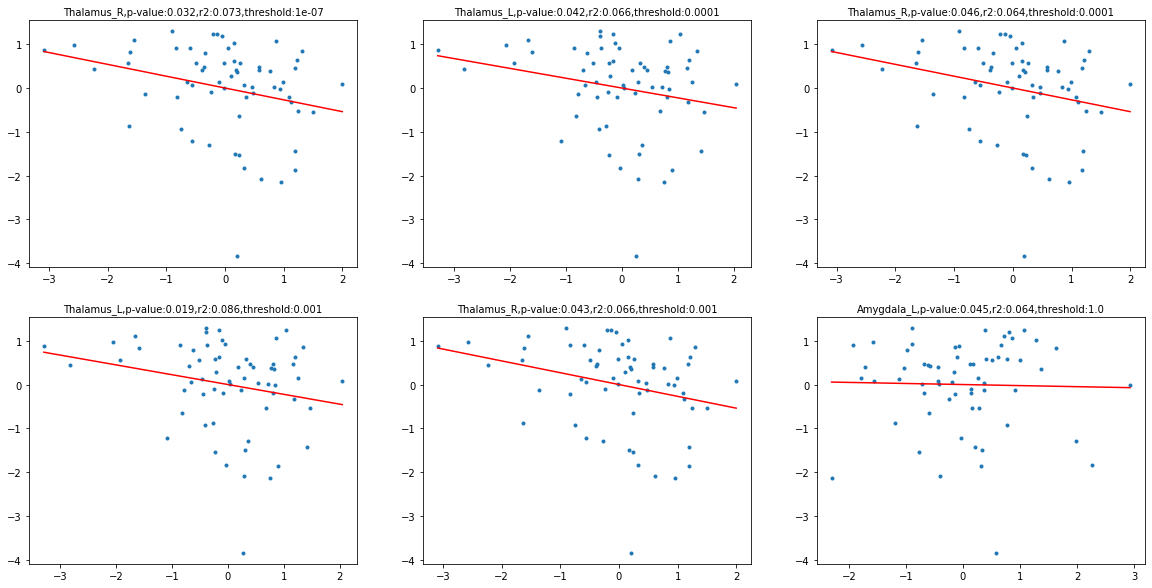

In [204]:
from sklearn.linear_model import LinearRegression
f,axes=plt.subplots(2,3,figsize=(20,10))

def plot_univariate_features(ax,label,index):
    X=adjusted_european_volumetric_AAL_matrix[:,np.where(AAL_label==label)[0]]
    X=StandardScaler().fit_transform(X.reshape(-1,1))
    y=adjusted_european_PRS_schizophrenia[:,1]
    y=StandardScaler().fit_transform(y.reshape(-1,1))
    ax.plot(X,y,'.')
    lin_reg=LinearRegression()
    lin_reg.fit(X,y)
    X_pred=np.linspace(np.min(X),np.max(X),50).reshape(-1,1)
    y_pred=lin_reg.predict(X_pred)
    ax.plot(X_pred,y_pred,'r-')
    
    title_text=','.join([label,
    'p-value:'+str(np.round(full_df.loc[index,label],3)),
    'r2:'+str(np.round(full_df.loc[index-1,label],3)),
    'threshold:'+str(full_df.iloc[index,0])])
    ax.set_title(title_text,fontdict={'fontsize':10})

plot_univariate_features(axes[0,0],'Thalamus_R',3)
plot_univariate_features(axes[0,1],'Thalamus_L',9)
plot_univariate_features(axes[0,2],'Thalamus_R',9)
plot_univariate_features(axes[1,0],'Thalamus_L',11)
plot_univariate_features(axes[1,1],'Thalamus_R',11)
plot_univariate_features(axes[1,2],'Amygdala_L',21)

## Term babies

In [7]:
adjusted_european_volumetric_AAL_matrix=np.load('./preprocessed_data/term/adjusted_european_volumetric_AAL_matrix.npy')
AAL_label=np.load('./preprocessed_data/term/AAL_label.npy')
adjusted_european_PRS_schizophrenia=np.load('./preprocessed_data/term/adjusted_european_PRS_schizophrenia.npy')

In [8]:
subcortical_structures_idx=np.asarray([idx for idx,i in enumerate(AAL_label) if 'Thalamus' in i or 'Caudate' in i or 'Putamen' in i or 'Pallidum' in i or 'Hippocampus' in i or 'Amygdala' in i])

In [10]:
#UNIVARIATE TESTING. Calculated by first estimating fitting a simple linear model to each regressor, and then calculate the R2. From R2, we calculate the F-score and with that P-value. The False discovery rate method adjust the p-value.

from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import fdrcorrection
import statsmodels.api as sm
p_thresholds=[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1]

temp_df_dict=[]
for p_threshold in range(len(p_thresholds)):
    temp_df=pd.DataFrame({'PRS threshold':np.repeat(p_thresholds[p_threshold],2),
    'Measures':['R2','p-value']})
    for i in range(len(subcortical_structures_idx)):
        X=adjusted_european_volumetric_AAL_matrix[:,subcortical_structures_idx[i]]
        X=X.reshape(-1,1)
        X=StandardScaler().fit_transform(X)
        X=sm.add_constant(X)
        y=adjusted_european_PRS_schizophrenia[:,p_threshold]
        y=StandardScaler().fit_transform(y.reshape(-1,1))

        res=sm.OLS(y,X).fit()
        intercept=res.params[0]
        temp_df[AAL_label[subcortical_structures_idx[i]]]=[res.rsquared,res.pvalues[1]]
    temp_df_dict.append(temp_df)

    # F_score,p_value=f_regression(X,y)
    # p_value_dict[p_threshold]=p_value
    # survived_idx,adjusted_p_values=fdrcorrection(p_value,alpha=0.05)
    # print('For threshold of %s, %d features were significant, but %d survived the FDR correction' %(p_threshold,
    # len(p_value[p_value<0.05]),len(np.where(survived_idx)[0])))

In [11]:
full_df=pd.concat([i for i in temp_df_dict],ignore_index=True)
full_df

,PRS threshold,Measures,Hippocampus_L,Hippocampus_R,Amygdala_L,Amygdala_R,Caudate_L,Caudate_R,Putamen_L,Putamen_R,Pallidum_L,Pallidum_R,Thalamus_L,Thalamus_R
0,1.000000e-08,R2,0.001994,1.192399e-04,0.021750,0.009831,0.015402,0.020559,0.010803,0.005706,0.016818,0.001583,0.041830,0.025919
1,1.000000e-08,p-value,0.536375,8.798847e-01,0.040158,0.168990,0.084698,0.046097,0.149242,0.295162,0.071506,0.581775,0.004229,0.024928
2,1.000000e-07,R2,0.000814,4.439203e-04,0.018008,0.005118,0.011493,0.015307,0.007317,0.004402,0.015567,0.001562,0.034999,0.021687
3,1.000000e-07,p-value,0.692848,7.705933e-01,0.062115,0.321567,0.136799,0.085671,0.235649,0.358037,0.083031,0.584236,0.009001,0.040451
4,1.000000e-06,R2,0.000007,2.358200e-03,0.018395,0.005182,0.012476,0.016403,0.005517,0.002771,0.014535,0.000922,0.029498,0.016777
5,1.000000e-06,p-value,0.971041,5.013250e-01,0.059352,0.318547,0.121006,0.075129,0.303356,0.466040,0.094036,0.674328,0.016639,0.071860
6,1.000000e-05,R2,0.000671,2.532512e-04,0.027003,0.007474,0.007874,0.011316,0.004053,0.001933,0.010039,0.000100,0.030334,0.014694
7,1.000000e-05,p-value,0.719972,8.256873e-01,0.022045,0.230689,0.218562,0.139877,0.377809,0.542748,0.164515,0.889828,0.015151,0.092245
8,1.000000e-04,R2,0.000842,1.052020e-06,0.027507,0.007393,0.004723,0.007638,0.001134,0.000408,0.004120,0.000002,0.021002,0.010894
9,1.000000e-04,p-value,0.687917,9.886754e-01,0.020824,0.233228,0.341010,0.225618,0.641174,0.779913,0.373919,0.984066,0.043788,0.147532


In [12]:
full_df_p_value=full_df[full_df['Measures']=='p-value']
full_df_p_value_005=full_df_p_value[(full_df_p_value.iloc[:,2:]<0.05).any(axis='columns')]
full_df_p_value_005

,PRS threshold,Measures,Hippocampus_L,Hippocampus_R,Amygdala_L,Amygdala_R,Caudate_L,Caudate_R,Putamen_L,Putamen_R,Pallidum_L,Pallidum_R,Thalamus_L,Thalamus_R
1,1.000000e-08,p-value,0.536375,0.879885,0.040158,0.168990,0.084698,0.046097,0.149242,0.295162,0.071506,0.581775,0.004229,0.024928
3,1.000000e-07,p-value,0.692848,0.770593,0.062115,0.321567,0.136799,0.085671,0.235649,0.358037,0.083031,0.584236,0.009001,0.040451
5,1.000000e-06,p-value,0.971041,0.501325,0.059352,0.318547,0.121006,0.075129,0.303356,0.466040,0.094036,0.674328,0.016639,0.071860
7,1.000000e-05,p-value,0.719972,0.825687,0.022045,0.230689,0.218562,0.139877,0.377809,0.542748,0.164515,0.889828,0.015151,0.092245
9,1.000000e-04,p-value,0.687917,0.988675,0.020824,0.233228,0.341010,0.225618,0.641174,0.779913,0.373919,0.984066,0.043788,0.147532
11,1.000000e-03,p-value,0.299240,0.784507,0.007767,0.148091,0.950664,0.632284,0.769992,0.945106,0.575801,0.953617,0.082862,0.160368
13,1.000000e-02,p-value,0.619541,0.608518,0.011183,0.133655,0.699506,0.954562,0.988625,0.775572,0.964799,0.757592,0.719015,0.753198
15,5.000000e-02,p-value,0.402361,0.995292,0.014440,0.199724,0.195367,0.390707,0.650203,0.552748,0.524260,0.344143,0.837046,0.540167
17,1.000000e-01,p-value,0.191133,0.570905,0.029885,0.181534,0.175646,0.343549,0.599094,0.549676,0.508540,0.344105,0.697013,0.429847
19,5.000000e-01,p-value,0.328618,0.830978,0.046065,0.244046,0.193087,0.338459,0.603340,0.556037,0.559865,0.306205,0.345933,0.258267


In [13]:
full_df_p_value_005.columns[2:][(full_df_p_value_005.iloc[:,2:]<0.05).any(axis='rows')]

Index(['Amygdala_L', 'Caudate_R', 'Thalamus_L', 'Thalamus_R'], dtype='object')

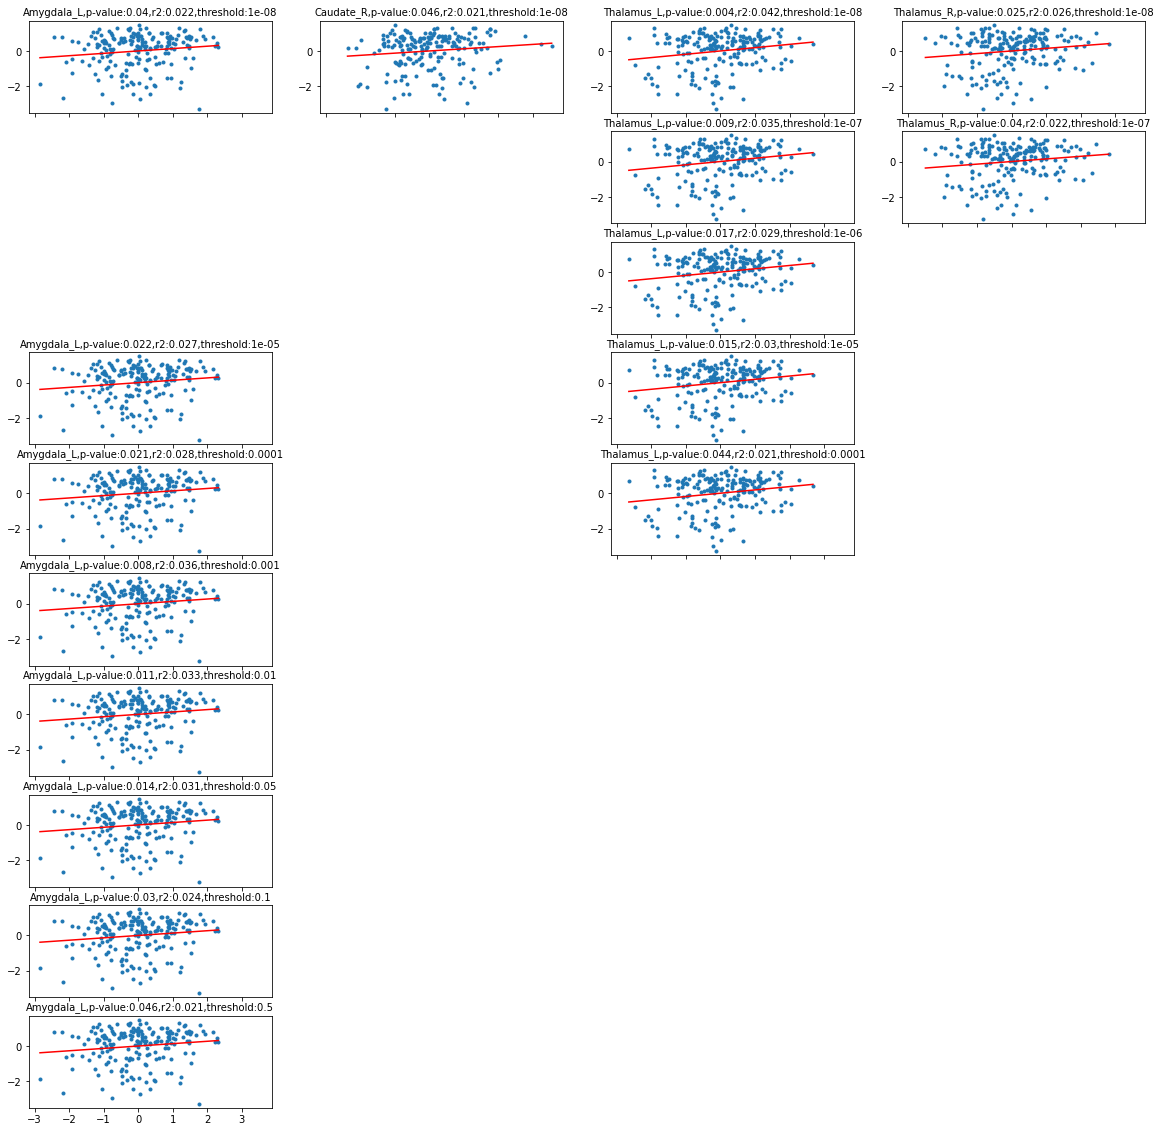

In [27]:
from sklearn.linear_model import LinearRegression
f,axes=plt.subplots(10,4,sharex=True,figsize=(20,20))

def plot_univariate_features(ax,label,index):
    X=adjusted_european_volumetric_AAL_matrix[:,np.where(AAL_label==label)[0]]
    X=StandardScaler().fit_transform(X.reshape(-1,1))
    y=adjusted_european_PRS_schizophrenia[:,1]
    y=StandardScaler().fit_transform(y.reshape(-1,1))
    ax.plot(X,y,'.')
    lin_reg=LinearRegression()
    lin_reg.fit(X,y)
    X_pred=np.linspace(np.min(X),np.max(X),50).reshape(-1,1)
    y_pred=lin_reg.predict(X_pred)
    ax.plot(X_pred,y_pred,'r-')
    
    title_text=','.join([label,
    'p-value:'+str(np.round(full_df.loc[index,label],3)),
    'r2:'+str(np.round(full_df.loc[index-1,label],3)),
    'threshold:'+str(full_df.iloc[index,0])])
    ax.set_title(title_text,fontdict={'fontsize':10})

plot_univariate_features(axes[0,0],'Amygdala_L',1)
plot_univariate_features(axes[0,1],'Caudate_R',1)
plot_univariate_features(axes[0,2],'Thalamus_L',1)
plot_univariate_features(axes[0,3],'Thalamus_R',1)
plot_univariate_features(axes[1,2],'Thalamus_L',3)
plot_univariate_features(axes[1,3],'Thalamus_R',3)
plot_univariate_features(axes[2,2],'Thalamus_L',5)
plot_univariate_features(axes[3,0],'Amygdala_L',7)
plot_univariate_features(axes[3,2],'Thalamus_L',7)
plot_univariate_features(axes[4,0],'Amygdala_L',9)
plot_univariate_features(axes[4,2],'Thalamus_L',9)
plot_univariate_features(axes[5,0],'Amygdala_L',11)
plot_univariate_features(axes[6,0],'Amygdala_L',13)
plot_univariate_features(axes[7,0],'Amygdala_L',15)
plot_univariate_features(axes[8,0],'Amygdala_L',17)
plot_univariate_features(axes[9,0],'Amygdala_L',19)

f.delaxes(ax=axes[1,0])
f.delaxes(ax=axes[1,1])
f.delaxes(ax=axes[2,0])
f.delaxes(ax=axes[2,1])
f.delaxes(ax=axes[2,3])
f.delaxes(ax=axes[3,1])
f.delaxes(ax=axes[3,3])
f.delaxes(ax=axes[4,1])
f.delaxes(ax=axes[4,3])
f.delaxes(ax=axes[5,1])
f.delaxes(ax=axes[5,2])
f.delaxes(ax=axes[5,3])
f.delaxes(ax=axes[6,1])
f.delaxes(ax=axes[6,2])
f.delaxes(ax=axes[6,3])
f.delaxes(ax=axes[7,1])
f.delaxes(ax=axes[7,2])
f.delaxes(ax=axes[7,3])
f.delaxes(ax=axes[8,1])
f.delaxes(ax=axes[8,2])
f.delaxes(ax=axes[8,3])
f.delaxes(ax=axes[9,1])
f.delaxes(ax=axes[9,2])
f.delaxes(ax=axes[9,3])